OpenCV 라이브러리 import 및 버전 확인

In [3]:
import cv2
print(cv2.__version__)

4.5.5


## 이미지를 읽어서 픽셀 한 개를 변수에 할당한다 -> px : [x 좌표, y 좌표]

In [4]:
img = cv2.imread("data/img/example.jpeg") # 이미지를 읽는다.

In [3]:
px = img[100, 100]   # 이미지의 f(x,y) = (100, 100) 좌표의 픽셀을 이미지로부터 읽어서 px 변수에 할당한다.

In [4]:
print(px)   # 픽셀을 출력하면 RGB 형태의 색상 값을 출력한다.

[189 191 255]


### BGR 순으로 x축(0), y축(1), z축(2)을 나타내며 각각의 값을 정수 값으로 추출할 수 있다.

In [5]:
blue = img[100, 100, 0]
red = img[100, 100, 1]
green = img[100, 100, 2]

In [6]:
print(blue)
print(red)
print(green)

189
191
255


In [7]:
img[100, 100] = [255, 255, 255]  # 반대로 이미지 픽셀 정보를 BRG 순서로 전달해서 픽셀의 값을 할당할 수 있다.

In [5]:
print(img[100,100])

[189 191 255]


### 이미지 속성값에 접근하기

In [9]:
print( img.shape )  # row 수, column 수, 채널 수(ex. BRG 컬러라면 3, 흑백은 ???)

(828, 828, 3)


In [10]:
print( img.dtype ) # 데이터 타입 : Unsigned Integer

uint8


In [11]:
part = img[280:340, 330:390] # 이미지의 특정 영역 추출

In [12]:
print(part)

[[[193 193 247]
  [190 192 250]
  [181 191 255]
  ...
  [190 189 255]
  [195 190 255]
  [197 192 255]]

 [[187 190 255]
  [185 191 255]
  [182 192 255]
  ...
  [198 197 255]
  [199 194 255]
  [195 190 255]]

 [[191 191 255]
  [189 191 255]
  [185 193 253]
  ...
  [193 192 254]
  [191 189 255]
  [192 190 255]]

 ...

 [[190 192 255]
  [190 192 255]
  [190 193 254]
  ...
  [191 194 255]
  [190 193 254]
  [190 193 254]]

 [[190 192 255]
  [190 192 255]
  [190 193 254]
  ...
  [190 193 254]
  [190 193 254]
  [190 193 254]]

 [[190 192 255]
  [190 192 255]
  [189 192 253]
  ...
  [189 192 253]
  [189 192 253]
  [189 192 253]]]


BGR 이미지 -> 채널 분리

In [14]:
b,g,r = cv2.split(img)

분리했던 채널 이미지로 합치기

In [15]:
img = cv2.merge((b,g,r))

### 이미지에 외곽선 그리기

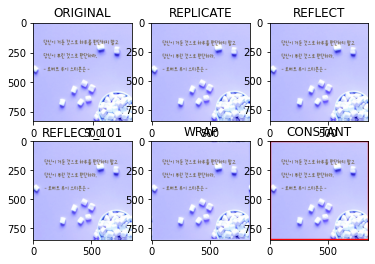

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv.imread('data/img/example.jpeg')
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

 ### cv.add(), cv.addWeighted()

numpy와 OpenCV의 다른 점

In [17]:
x = np.uint8([250])
y = np.uint8([10])

In [18]:
print( cv.add(x,y) ) # 250+10 = 260 => 255

[[255]]


In [19]:
print( x+y )          # 250+10 = 260 % 256 = 4

[4]


g(x)=(1−α)f0(x)+αf1(x)

dst=α⋅img1+β⋅img2+γ

In [ ]:
# Load two images
img1 = cv.imread('data/img/example.jpeg')
img2 = cv.imread('data/img/example2.jpeg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()